# Final Project - Using a cloned arcgispro workspace with geopandas and rasterio


### Import modules and other information

In [22]:
import geopandas
import rasterio 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import arcpy
arcpy.CheckOutExtension("Spatial")

'CheckedOut'

In [9]:
# Import needed for arcpy version
from arcpy import env

### Import data 

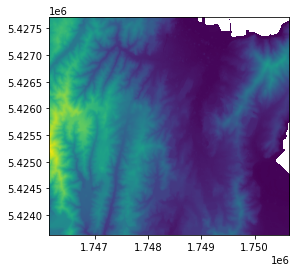

In [10]:
# Raster dataset
from rasterio.plot import show
DEM = rasterio.open('new_dem.tif') 
show(DEM)

# Linear feature
roadseg = geopandas.read_file("roadseg.shp")
#roadseg.plot()


### Create input variables

In [ ]:
#Distance between points

#Observer offset - Height of observer

#Surface offset - Height of feature



### Generate points along lines using distance between points variable

In [48]:
from arcpy import env
from arcpy.management import *

#?arcpy.management.GeneratePointsAlongLines
arcpy.env.overwriteOutput = True

# Set local variables
#in_features = roadseg
#out_fc_1 = 'distance_intervals'

# Execute GeneratePointsAlongLines by distance
#arcpy.management.GeneratePointsAlongLines(in_features, out_fc_1, 'DISTANCE', Distance='500 meters')

arcpy.ImportToolbox(r"c:\program files\arcgis\pro\Resources\ArcToolbox\toolboxes\Data Management Tools.tbx")
roadseg_shp = "C:\\Users\\barbourhia\\OneDrive - Victoria University of Wellington - STUDENT\\Geographical Computing\\Final_Project\\roadseg.shp"
Distance = "75 Meters"

# Process: Generate Points Along Lines (Generate Points Along Lines) (management)
roadseg_GeneratePointsAlongLines = "C:\\Users\\barbourhia\\OneDrive - Victoria University of Wellington - STUDENT\\Geographical Computing\\Final_Project\\roadseg_GeneratePointsAlongLines4.shp" #define new location
arcpy.management.GeneratePointsAlongLines(Input_Features=roadseg_shp, Output_Feature_Class=roadseg_GeneratePointsAlongLines, Point_Placement="DISTANCE", Distance=Distance, Percentage=None, Include_End_Points="END_POINTS")


    

<Result 'C:\\Users\\barbourhia\\OneDrive - Victoria University of Wellington - STUDENT\\Geographical Computing\\Final_Project\\roadseg_GeneratePointsAlongLines4.shp'>

### Running and testing viewshed

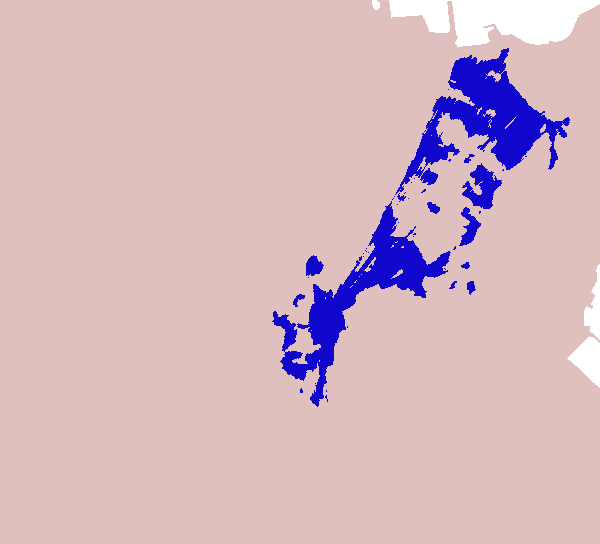

In [41]:

# Run viewshed using observer offset and surface offset (if possible)
from arcpy import env
from arcpy.sa import *
arcpy.OverwriteOutput = True 

new_dem_2_ = arcpy.Raster("C:\\Users\\barbourhia\\OneDrive - Victoria University of Wellington - STUDENT\\Geographical Computing\\Final_Project\\new_dem")
Surface_Offset = "5"
Observer_Offset = "1.75"
testpoint = "C:\\Users\\barbourhia\\OneDrive - Victoria University of Wellington - STUDENT\\Geographical Computing\\Final_Project\\testpoint.shp"

#vis_Feature_ = "C:\\Users\\barbourhia\\OneDrive - Victoria University of Wellington - STUDENT\Documents\\GeoComp\\vis"
# grlv = "C:\\Users\\barbourhia\\OneDrive - Victoria University of Wellington - STUDENT\\Documents\\GeoComp\\grlv3"
visrast = arcpy.sa.Visibility(in_raster=new_dem_2_, 
                     in_observer_features=testpoint, 
                     out_agl_raster=grlv,
                     analysis_type="FREQUENCY",
                     nonvisible_cell_value="ZERO", 
                     z_factor=1, 
                     curvature_correction="FLAT_EARTH",
                     refractivity_coefficient=0.13,
                     surface_offset=Surface_Offset,
                     observer_elevation="",
                     observer_offset=Observer_Offset,
                     inner_radius="",
                     outer_radius="",
                     horizontal_start_angle="",
                     horizontal_end_angle="",
                     vertical_upper_angle="",
                     vertical_lower_angle="")
#vis_Feature_ = arcpy.Raster(vis_Feature_)

#viewshed analysis for testpoint1
visrast_testpoint1 = visrast 
visrast_testpoint1


# https://gis.stackexchange.com/questions/29414/viewshed-analysis-with-gdal
# https://ncsu-geoforall-lab.github.io/uav-lidar-analytics-course/assignments/python_intro.html




## Interate betwen points and run viewshed for each point, appending results

This part was a bit challenging for us because in order to make the interation between points work, we needed to convert the data to geopandas and then back out to an .shp file before running the viewshed. From our understanding, the .arcpy viewshed was very particular in the dataset that it was able to take. 

In [97]:
#extracting points 
points = geopandas.read_file("C:\\Users\\barbourhia\\OneDrive - Victoria University of Wellington - STUDENT\\Geographical Computing\\Final_Project\\roadseg_GeneratePointsAlongLines4.shp")
print(points)
#for loop performing viewshed on each feature
for p, row in points.iterrows():
    inpoint = row['geometry']
    print(inpoint)
    invpoint = geopandas.GeoDataFrame(inpoint, geometry='geometry')
    print(invpoint)
 #   geopandas.to_file('Invpoint.shp', driver='ESRI Shapefile')

# Append viewshed to previous output and then repeat
   

   Id  ORIG_FID  Id_1                         geometry
0   0         0     0  POINT (1748554.699 5424908.340)
1   0         0     0  POINT (1748532.972 5424974.159)
2   0         0     0  POINT (1748505.101 5425034.629)
3   0         0     0  POINT (1748495.326 5425099.106)
4   0         0     0  POINT (1748507.082 5425172.872)
5   0         0     0  POINT (1748528.296 5425242.553)
6   0         0     0  POINT (1748563.206 5425291.144)
POINT (1748554.6992 5424908.34)


ValueError: DataFrame constructor not properly called!

We tried to iterate using .arcpy before deciding on the above approach. This is super messy and hard to understand. No wonder ModelBuilder doesn't iterate well!

In [77]:
# Attempt at iteration with .arcpy
from arcpy.management import *
from arcpy.da import *
newpoints = arcpy.management.MakeFeatureLayer("roadseg_GeneratePointsAlongLines4.shp", "invpoints.shp")

with arcpy.da.SearchCursor('invpoints.shp', fields) as cursor:
  for row in cursor:
    select = 'OBJECTID = {}'.format(row[0])        
    arcpy.SelectLayerByLocation_management('invpoints.shp','NEW_SLECTION')
    arcpy.CopyFeatures_management("invpoints.shp_{}'.format(row[1])


#type(points)
#for p in points:
#    print(p[3:4])

SyntaxError: EOL while scanning string literal (<ipython-input-77-31fc88261b40>, line 9)

### Add together and and wrap in a function

### Write resulting raster to file

In [3]:
pip install grass.script

Note: you may need to restart the kernel to use updated packages.
